# Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.


Objective
The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

# Table of Content

#### Step 1: Importing the Relevant Libraries

#### Step 2: Data Inspection

#### Step 3: Data Cleaning

#### Step 4: Exploratory Data Analysis

#### Step 5: Building Model

#### Step 6 : Make a Submission

### Step 1: Importing the Relevant Libraries

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from pandas_profiling import ProfileReport

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
train = pd.read_csv('E:\\Machine Learning\\Analytics Vidhya Jobathon\\Jobathon\\train_0OECtn8.csv')
test = pd.read_csv('E:\\Machine Learning\\Analytics Vidhya Jobathon\\Jobathon\\test_1zqHu22.csv')

In [3]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(89197, 11) (11121, 10) (100318, 11)


In [4]:
data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,source
0,1,19990,37,128,24,Male,Student,180,1000,4.33,train
1,2,5304,32,132,14,Female,Student,330,714,1.79,train
2,3,1840,12,24,19,Male,Student,180,138,4.35,train
3,4,12597,23,112,19,Male,Student,220,613,3.77,train
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,train


In [5]:
#Numerical data summary:
data.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,100318.000000,100318.000000,100318.000000,100318.000000,100318.000000,100318.000000,100318.000000,89197.000000
mean,50159.500000,13875.679350,18.029157,77.940110,24.849229,252.153253,497.656861,3.487797
std,28959.456489,8005.079041,11.562197,48.499456,8.955318,45.324580,266.974474,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,25080.250000,6938.250000,8.000000,35.000000,18.000000,230.000000,229.000000,2.900000
50%,50159.500000,13889.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,75238.750000,20813.000000,26.000000,121.000000,32.000000,280.000000,709.000000,4.150000
max,100318.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


### Step 3: Data Cleaning

In [6]:
#Check missing values
data.isnull().sum()

row_id                  0
user_id                 0
category_id             0
video_id                0
age                     0
gender                  0
profession              0
followers               0
views                   0
engagement_score    11121
source                  0
dtype: int64

In [7]:
#Filling missing values
data.engagement_score = data.engagement_score.fillna(data.engagement_score.mean())

In [8]:
data.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
source              0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100318 entries, 0 to 100317
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   row_id            100318 non-null  int64  
 1   user_id           100318 non-null  int64  
 2   category_id       100318 non-null  int64  
 3   video_id          100318 non-null  int64  
 4   age               100318 non-null  int64  
 5   gender            100318 non-null  object 
 6   profession        100318 non-null  object 
 7   followers         100318 non-null  int64  
 8   views             100318 non-null  int64  
 9   engagement_score  100318 non-null  float64
 10  source            100318 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 8.4+ MB


### Step 4: Exploratory Data Analysis

<AxesSubplot:xlabel='age'>

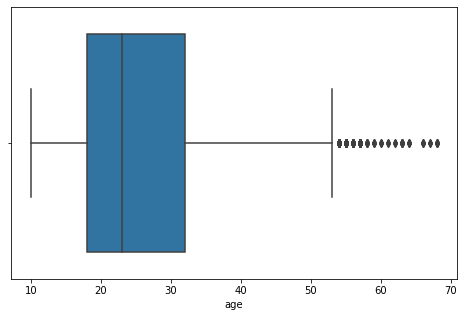

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot('age',data = data)

<AxesSubplot:xlabel='followers'>

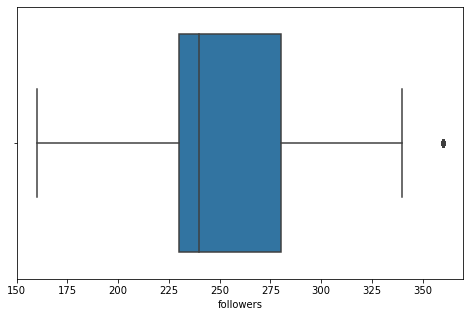

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot('followers',data = data)

<AxesSubplot:xlabel='views'>

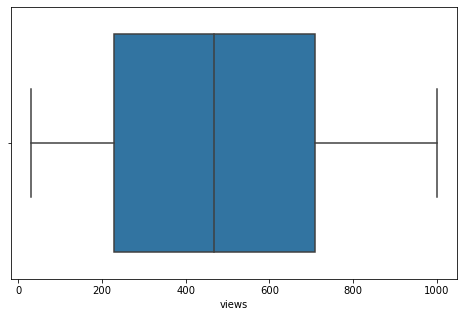

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot('views',data = data)

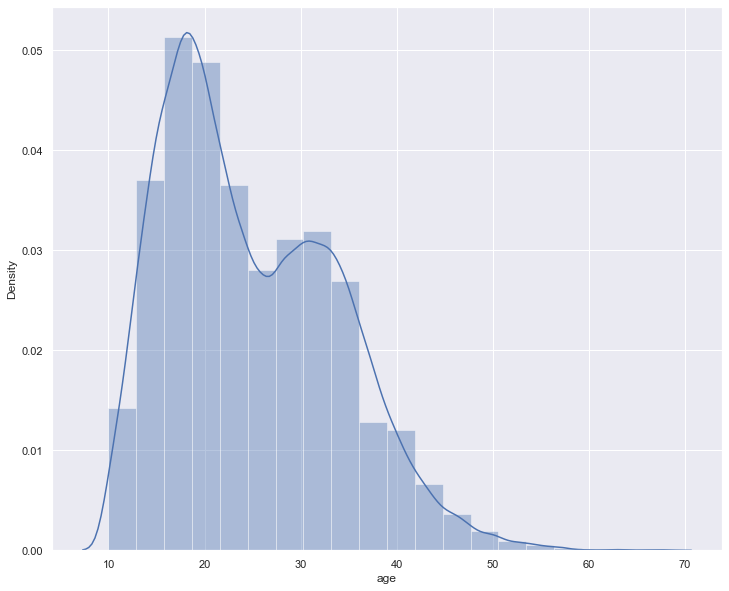

In [15]:
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(data['age'], bins=20)
plt.show()

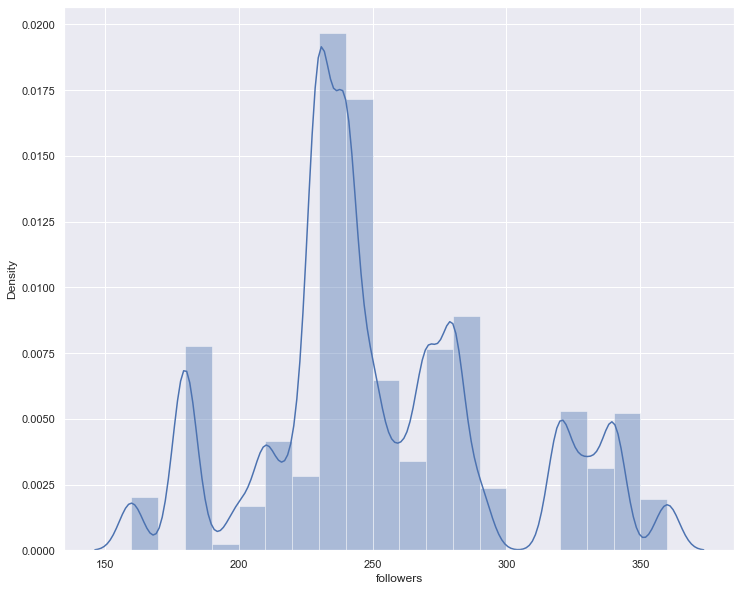

In [19]:
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(data['followers'], bins=20)
plt.show()

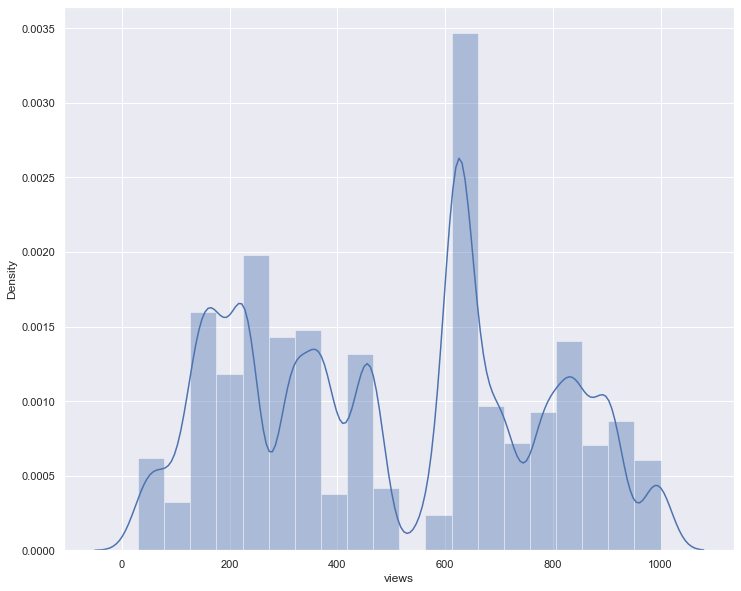

In [16]:
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(data['views'], bins=20)
plt.show()

#### Outlier Treatment

In [17]:
data['age'].describe()

count    100318.000000
mean         24.849229
std           8.955318
min          10.000000
25%          18.000000
50%          23.000000
75%          32.000000
max          68.000000
Name: age, dtype: float64

In [18]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=data['age'].mean() + 3* data['age'].std()
lower_boundary=data['age'].mean() - 3* data['age'].std()
print(lower_boundary), print(uppper_boundary),print(data['age'].mean())

-2.0167243324770787
51.715183233172866
24.849229450347895


(None, None, None)

In [19]:
data.loc[data['age']>=51,'age']=51  #Removing the outliers

In [20]:
data.head(100)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,source
0,1,19990,37,128,24,Male,Student,180,1000,4.33,train
1,2,5304,32,132,14,Female,Student,330,714,1.79,train
2,3,1840,12,24,19,Male,Student,180,138,4.35,train
3,4,12597,23,112,19,Male,Student,220,613,3.77,train
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,train
...,...,...,...,...,...,...,...,...,...,...,...
95,96,1967,9,18,27,Male,Other,230,819,4.53,train
96,97,9311,19,1,26,Female,Other,230,369,3.04,train
97,98,26325,8,146,19,Male,Student,280,628,4.21,train
98,99,26763,11,77,18,Female,Student,250,180,1.50,train


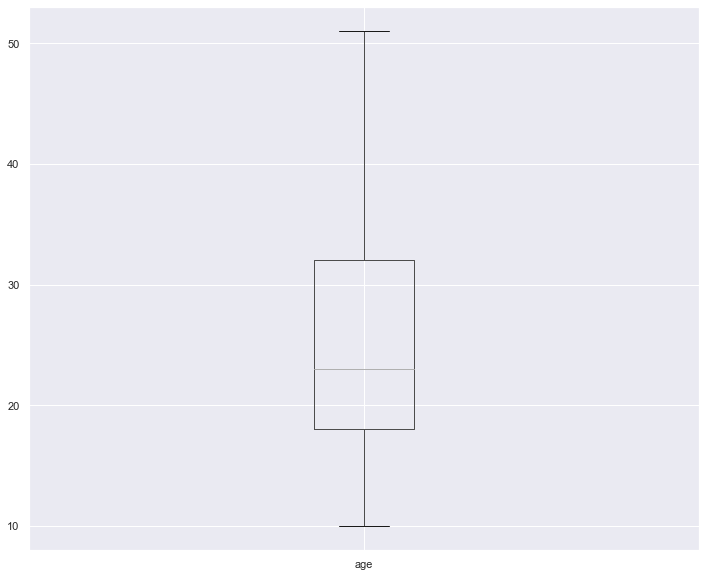

In [21]:
figure=data.boxplot(column="age")

In [22]:
data['followers'].describe()

count    100318.000000
mean        252.153253
std          45.324580
min         160.000000
25%         230.000000
50%         240.000000
75%         280.000000
max         360.000000
Name: followers, dtype: float64

In [23]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data.followers.quantile(0.75)-data.followers.quantile(0.25)

In [24]:
lower_bridge=data['followers'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['followers'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

155.0
355.0


(None, None)

In [25]:
data.loc[data['followers']>=355,'followers']=355

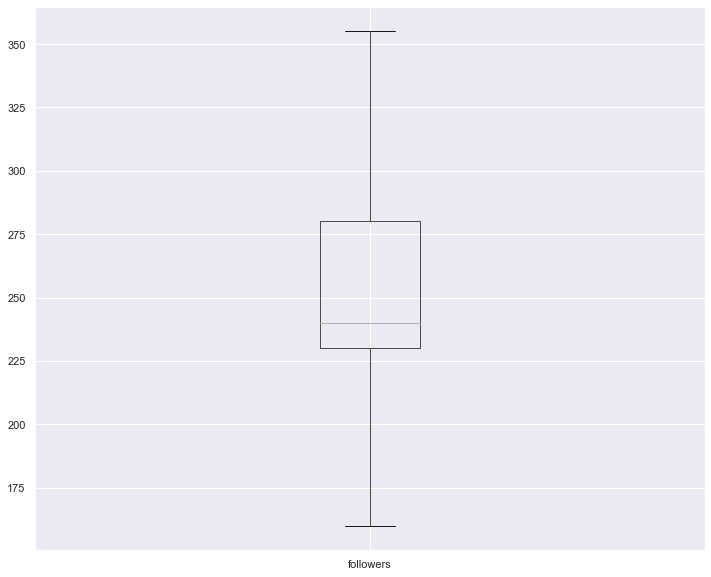

In [26]:
figure=data.boxplot(column="followers")

#### One-Hot Coding of Categorical variables

In [27]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['gender','profession'])

In [28]:
data.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,source,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,1,19990,37,128,24,180,1000,4.33,train,0,1,0,1,0
1,2,5304,32,132,14,330,714,1.79,train,1,0,0,1,0
2,3,1840,12,24,19,180,138,4.35,train,0,1,0,1,0
3,4,12597,23,112,19,220,613,3.77,train,0,1,0,1,0
4,5,13626,23,112,27,220,613,3.13,train,0,1,0,0,1


In [34]:
data.dtypes

row_id                               int64
user_id                              int64
category_id                          int64
video_id                             int64
age                                  int64
followers                            int64
views                                int64
engagement_score                   float64
source                              object
gender_Female                        uint8
gender_Male                          uint8
profession_Other                     uint8
profession_Student                   uint8
profession_Working Professional      uint8
dtype: object

### Exporting Data

In [35]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['engagement_score','row_id','source'],axis=1,inplace=True)
train.drop(['row_id','source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified_1.csv",index=False)
test.to_csv("test_modified_1.csv",index=False)

In [36]:
train

,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,4.33,0,1,0,1,0
1,5304,32,132,14,330,714,1.79,1,0,0,1,0
2,1840,12,24,19,180,138,4.35,0,1,0,1,0
3,12597,23,112,19,220,613,3.77,0,1,0,1,0
4,13626,23,112,27,220,613,3.13,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,340,662,3.91,0,1,1,0,0
89193,20466,20,47,31,240,892,3.56,0,1,1,0,0
89194,13655,16,97,25,270,462,4.23,0,1,0,1,0
89195,24840,9,18,35,230,819,3.77,0,1,0,0,1


In [37]:
test

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
89197,7986,12,42,14,180,138,0,1,0,1,0
89198,11278,34,115,14,230,840,0,1,0,1,0
89199,17245,8,110,44,280,628,1,0,0,0,1
89200,9851,16,137,18,270,462,0,1,0,1,0
89201,16008,34,96,47,230,840,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
100313,26336,25,140,21,240,317,0,1,0,1,0
100314,6772,8,100,19,280,628,1,0,0,1,0
100315,2042,16,98,22,270,462,0,1,0,1,0
100316,24626,8,16,33,280,628,0,1,1,0,0


#### Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>

In [38]:
train.shape

(89197, 12)

In [39]:
train.columns

Index(['user_id', 'category_id', 'video_id', 'age', 'followers', 'views',
       'engagement_score', 'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional'],
      dtype='object')

In [40]:
X= train.loc[:,['user_id', 'category_id', 'video_id', 'age', 'followers',
       'views', 'gender_Female', 'gender_Male',
       'profession_Other', 'profession_Student',
       'profession_Working Professional']]
X.head()

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,0,1,0,1,0
1,5304,32,132,14,330,714,1,0,0,1,0
2,1840,12,24,19,180,138,0,1,0,1,0
3,12597,23,112,19,220,613,0,1,0,1,0
4,13626,23,112,27,220,613,0,1,0,0,1


In [41]:
y = train.loc[:,['engagement_score']]
y.head()

,engagement_score
0,4.33
1,1.79
2,4.35
3,3.77
4,3.13


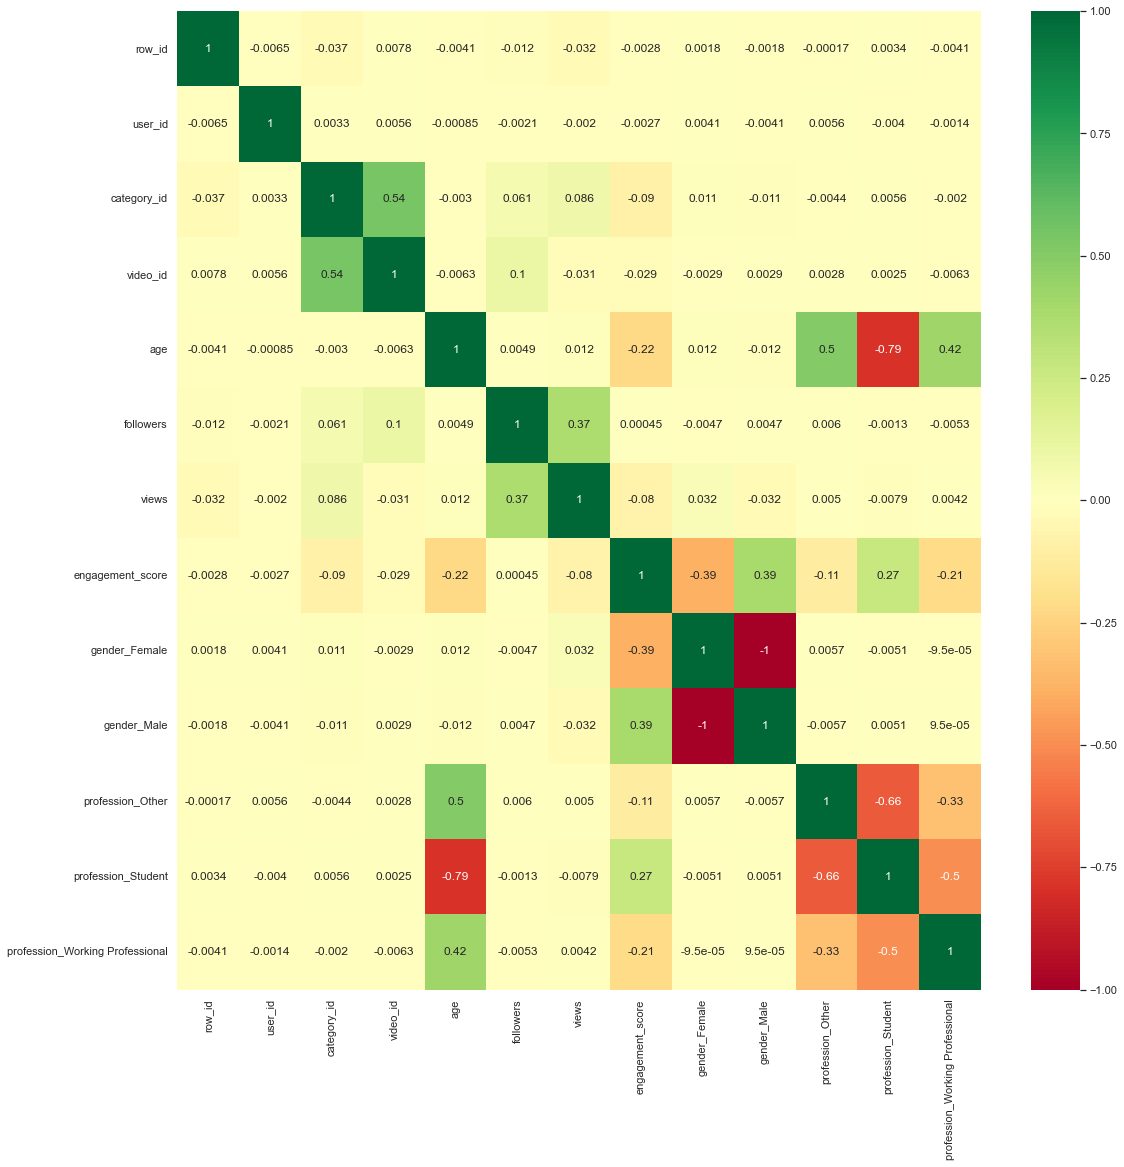

In [42]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [43]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)

[0.37896909 0.0322431  0.06801549 0.19841342 0.02348895 0.03990859
 0.06514441 0.10189253 0.00614079 0.08291551 0.00286811]


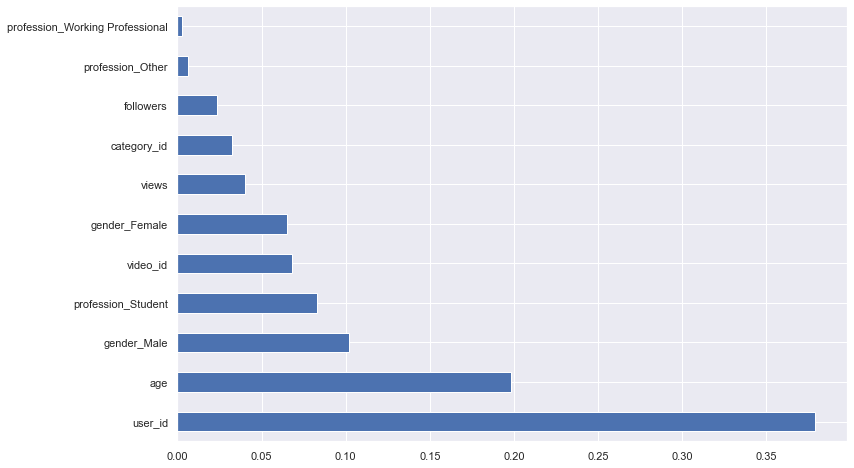

In [45]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
train

,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,4.33,0,1,0,1,0
1,5304,32,132,14,330,714,1.79,1,0,0,1,0
2,1840,12,24,19,180,138,4.35,0,1,0,1,0
3,12597,23,112,19,220,613,3.77,0,1,0,1,0
4,13626,23,112,27,220,613,3.13,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,340,662,3.91,0,1,1,0,0
89193,20466,20,47,31,240,892,3.56,0,1,1,0,0
89194,13655,16,97,25,270,462,4.23,0,1,0,1,0
89195,24840,9,18,35,230,819,3.77,0,1,0,0,1


In [47]:
test

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
89197,7986,12,42,14,180,138,0,1,0,1,0
89198,11278,34,115,14,230,840,0,1,0,1,0
89199,17245,8,110,44,280,628,1,0,0,0,1
89200,9851,16,137,18,270,462,0,1,0,1,0
89201,16008,34,96,47,230,840,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
100313,26336,25,140,21,240,317,0,1,0,1,0
100314,6772,8,100,19,280,628,1,0,0,1,0
100315,2042,16,98,22,270,462,0,1,0,1,0
100316,24626,8,16,33,280,628,0,1,1,0,0


### Step 5: Building Model

In [48]:
# Reading modified data
train2 = pd.read_csv("train_modified_1.csv")
test2 = pd.read_csv("test_modified_1.csv")

In [49]:
train2.head()

,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,4.33,0,1,0,1,0
1,5304,32,132,14,330,714,1.79,1,0,0,1,0
2,1840,12,24,19,180,138,4.35,0,1,0,1,0
3,12597,23,112,19,220,613,3.77,0,1,0,1,0
4,13626,23,112,27,220,613,3.13,0,1,0,0,1


In [50]:
X_train = train2.drop(['engagement_score'],axis=1)
y_train = train2.engagement_score

In [51]:
X_train

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,19990,37,128,24,180,1000,0,1,0,1,0
1,5304,32,132,14,330,714,1,0,0,1,0
2,1840,12,24,19,180,138,0,1,0,1,0
3,12597,23,112,19,220,613,0,1,0,1,0
4,13626,23,112,27,220,613,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,340,662,0,1,1,0,0
89193,20466,20,47,31,240,892,0,1,1,0,0
89194,13655,16,97,25,270,462,0,1,0,1,0
89195,24840,9,18,35,230,819,0,1,0,0,1


In [52]:
y_train

0        4.33
1        1.79
2        4.35
3        3.77
4        3.13
         ... 
89192    3.91
89193    3.56
89194    4.23
89195    3.77
89196    4.31
Name: engagement_score, Length: 89197, dtype: float64

In [53]:
X_test = test2

In [54]:
X_test

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,7986,12,42,14,180,138,0,1,0,1,0
1,11278,34,115,14,230,840,0,1,0,1,0
2,17245,8,110,44,280,628,1,0,0,0,1
3,9851,16,137,18,270,462,0,1,0,1,0
4,16008,34,96,47,230,840,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,240,317,0,1,0,1,0
11117,6772,8,100,19,280,628,1,0,0,1,0
11118,2042,16,98,22,270,462,0,1,0,1,0
11119,24626,8,16,33,280,628,0,1,1,0,0


### Linear Regression Model

In [55]:
# Fitting Multiple Linear Regression to the training set
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predicting the test set results
y_pred = LR.predict(X_test)

In [57]:
y_pred

array([4.10523892, 3.83474429, 2.76082891, ..., 4.07447283, 3.6686571 ,
       3.45080037])

In [58]:
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score 
LR_accuracy = round(LR.score(X_train,y_train) * 100,2)
LR_accuracy

27.23

In [59]:
r2_score(y_train, LR.predict(X_train))

0.2723468834099514

### Decision Tree Model

In [60]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [61]:
# Predicting the test set results
y_pred = DT.predict(X_test)
y_pred

array([4.16859425, 3.72194004, 2.71152577, ..., 3.96745562, 3.89205128,
       3.34509479])

In [62]:
tree_accuracy = round(DT.score(X_train,y_train),2)
tree_accuracy

0.35

In [63]:
r2_score(y_train, DT.predict(X_train))

0.3515176869281639

### Random Forest Model

In [64]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [65]:
# Predicting the test set results
y_pred = RF.predict(X_test)
y_pred

array([4.10659038, 3.95683727, 2.73262389, ..., 3.8459103 , 3.75575131,
       3.45163248])

In [66]:
rf_accuracy = round(RF.score(X_train,y_train),2)
rf_accuracy

0.33

In [67]:
r2_score(y_train, RF.predict(X_train))

0.330914928986481

### XGBoost

In [68]:
import xgboost as XG
xgb_r = XG.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

In [69]:
# Fitting the model
xgb_r.fit(X_train, y_train)

[16:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=16,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [70]:
# Predict the model
y_pred = xgb_r.predict(X_test)

In [71]:
xgb_accuracy = round(xgb_r.score(X_train,y_train),2)
xgb_accuracy

0.35

In [72]:
r2_score(y_train, xgb_r.predict(X_train))

0.34868697347706246

### Hyperparameter tuning

In [73]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [74]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [75]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [76]:
import xgboost as XG
regressor=XG.XGBRegressor()

In [77]:
random_search=RandomizedSearchCV(regressor,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [78]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 1 minutes and 8.1 seconds.


In [79]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=10, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [81]:
best_params = random_search.best_params_

In [82]:
xgb_model = XG.XGBRegressor(**best_params)

In [83]:
# Fitting the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=10, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
# Predict the model
y_pred = xgb_model.predict(X_test)

In [85]:
xgbm_accuracy = round(xgb_model.score(X_train,y_train),2)
xgbm_accuracy

0.56

In [86]:
r2_score(y_train, xgb_model.predict(X_train))

0.5631270350218938

In [87]:
import pickle
# open a file, where you want to store the data
file = open('engagement_score.pk2', 'wb')

# dump information to that file
pickle.dump(xgb_model, file)

In [88]:
filename1 = 'finalized_model.sav'
pickle.dump(xgb_model, open(filename1, 'wb'))

In [89]:
# load the model from disk
loaded_model = pickle.load(open(filename1, 'rb'))

y_prediction = loaded_model.predict(X_test)

In [91]:
y_prediction

array([4.1458826, 3.5412717, 2.9175193, ..., 3.6798286, 3.946899 ,
       3.1633563], dtype=float32)

### Step 6 : Make a Submission

In [90]:
submission = pd.read_csv('E:\Machine Learning\Analytics Vidhya Jobathon\Jobathon\sample_submission_JPlpRcN.csv')
final_predictions = xgb_model.predict(test)
submission['engagement_score'] = final_predictions
#only positive predictions for the target variable
submission['engagement_score'] = submission['engagement_score'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission2.csv', index=False)